In [50]:
#!pip install -q opendatasets

In [51]:
import pandas as pd
#import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [52]:
# od.download("https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv")

#### Part 1: Data Loading and Basic Exploration

In [53]:
covid_data = pd.read_csv('/content/metadata.csv', engine='python', quotechar='"', on_bad_lines='skip')
covid_data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [54]:
covid_data.info()
covid_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410897 entries, 0 to 410896
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          410897 non-null  object 
 1   sha               70567 non-null   object 
 2   source_x          410897 non-null  object 
 3   title             410473 non-null  object 
 4   doi               282393 non-null  object 
 5   pmcid             80192 non-null   object 
 6   pubmed_id         164884 non-null  object 
 7   license           410897 non-null  object 
 8   abstract          316831 non-null  object 
 9   publish_time      409600 non-null  object 
 10  authors           395855 non-null  object 
 11  journal           369364 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  185709 non-null  object 
 14  arxiv_id          4744 non-null    object 
 15  pdf_json_files    70567 non-null   object 
 16  pmc_json_files    55

,mag_id,s2_id
count,0.0,3.307050e+05
mean,NaN,2.070860e+08
std,NaN,6.785694e+07
min,NaN,1.695000e+03
25%,NaN,2.205016e+08
50%,NaN,2.318533e+08
75%,NaN,2.372500e+08
max,NaN,2.491936e+08


In [55]:
covid_data.isnull().sum()

,0
cord_uid,0
sha,340330
source_x,0
title,424
doi,128504
pmcid,330705
pubmed_id,246013
license,0
abstract,94066
publish_time,1297


### Part 2: Data Cleaning and Preparation

In [56]:
covid_data.duplicated().sum()
covid_data.shape

(410897, 19)

In [57]:
#Relpace categorical data missing value with the mode
def replace_cat_null(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0], inplace=True)
  return df

#Replace numerical missing data with the mean
def replace_num_null(df):
  for col in df.columns:
    if df[col].dtype != 'object':
      df[col].fillna(df[col].mean(), inplace=True)
  return df


#Drop a column if all the entry valaues are nan
def drop_nan_col(df):
  df.dropna(axis=1, how='all', inplace=True)
  return df


In [58]:
replace_cat_null(covid_data)
replace_num_null(covid_data)
drop_nan_col(covid_data)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,"##BR#""11130",0709.0406,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2.070860e+08
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,"##BR#""11130",0709.0406,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,"##BR#""11130",0709.0406,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,"##BR#""11130",0709.0406,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,"##BR#""11130",0709.0406,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410892,5ku2o5yz,c89f86cdd9d41eeec127cc0b03990c52888a9635,WHO,Psychological Crisis on Higher Education Stude...,10.1016/j.scitotenv.2020.139397,PMC1054884,33117894,unk,"In 2019, the whole world got hit due to the pa...",2021,"Minocha, Amrisha",BMJ,#ppcovidwho-326214,0709.0406,document_parses/pdf_json/c89f86cdd9d41eeec127c...,document_parses/pmc_json/PMC1054884.xml.json,http://clinchem.aaccjnls.org/content/clinchem/...,2.467279e+08
410893,zgp8gess,c89f86cdd9d41eeec127cc0b03990c52888a9635,WHO,A monthly roundup of key articles in other jou...,10.1016/j.scitotenv.2020.139397,PMC1054884,33117894,unk,"For a searchable version of these abstracts, p...",2021,"McOmish, Caitlin",Transfusion,#covidwho-1183263,0709.0406,document_parses/pdf_json/c89f86cdd9d41eeec127c...,document_parses/pmc_json/PMC1054884.xml.json,http://clinchem.aaccjnls.org/content/clinchem/...,2.083004e+08
410894,08zh1dyr,c89f86cdd9d41eeec127cc0b03990c52888a9635,WHO,Case with psychotic disorder as a clinical pre...,10.1016/j.scitotenv.2020.139397,PMC1054884,33117894,unk,"For a searchable version of these abstracts, p...",2020,"Majadas, Susana; Pérez, Javier; Casado-Espada,...",Psychiatry clin. neurosci,#635100,0709.0406,document_parses/pdf_json/c89f86cdd9d41eeec127c...,document_parses/pmc_json/PMC1054884.xml.json,http://clinchem.aaccjnls.org/content/clinchem/...,2.204123e+08
410895,wurqm6rq,c89f86cdd9d41eeec127cc0b03990c52888a9635,WHO,Immunological and virological profile of child...,10.1016/j.scitotenv.2020.139397,PMC1054884,33117894,unk,Objectives: In this study we tried to assess a...,202

In [59]:
covid_data.isnull().sum()

,0
cord_uid,0
sha,0
source_x,0
title,0
doi,0
pmcid,0
pubmed_id,0
license,0
abstract,0
publish_time,0


In [60]:
covid_data.shape

(410897, 18)

In [61]:
covid_data.describe(include='object')

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url
count,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897,410897
unique,385850,70566,7,375688,281900,80192,164688,18,297460,6318,340115,41661,185709,4744,70566,55815,303564
top,3xm3rbz5,c89f86cdd9d41eeec127cc0b03990c52888a9635,WHO,ACR Convergence 2020 Abstract Supplement,10.1016/j.scitotenv.2020.139397,PMC1054884,33117894,unk,"For a searchable version of these abstracts, p...",2021,"Anonymous,",BMJ,"##BR#""11130",0709.0406,document_parses/pdf_json/c89f86cdd9d41eeec127c...,document_parses/pmc_json/PMC1054884.xml.json,http://clinchem.aaccjnls.org/content/clinchem/...
freq,99,340332,185709,523,128512,330706,246017,293564,94166,102676,16263,45223,225189,406154,340332,355083,107334


In [62]:
clean_data=covid_data.to_csv('clean_data.csv', index=False)

In [63]:
clean_data = pd.read_csv('/content/clean_data.csv')
clean_data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,"##BR#""11130",709.0406,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2.070860e+08
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08


In [64]:
clean_data.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

In [65]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410897 entries, 0 to 410896
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          410897 non-null  object 
 1   sha               410897 non-null  object 
 2   source_x          410897 non-null  object 
 3   title             410897 non-null  object 
 4   doi               410897 non-null  object 
 5   pmcid             410897 non-null  object 
 6   pubmed_id         410897 non-null  object 
 7   license           410897 non-null  object 
 8   abstract          410897 non-null  object 
 9   publish_time      410897 non-null  object 
 10  authors           410897 non-null  object 
 11  journal           410897 non-null  object 
 12  who_covidence_id  410897 non-null  object 
 13  arxiv_id          410897 non-null  object 
 14  pdf_json_files    410897 non-null  object 
 15  pmc_json_files    410897 non-null  object 
 16  url               41

In [66]:
#converting publish_time column type from string to datetime
clean_data['publish_time'] = pd.to_datetime(clean_data['publish_time'], format='mixed', errors='coerce')

In [67]:
clean_data.info()
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410897 entries, 0 to 410896
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   cord_uid          410897 non-null  object        
 1   sha               410897 non-null  object        
 2   source_x          410897 non-null  object        
 3   title             410897 non-null  object        
 4   doi               410897 non-null  object        
 5   pmcid             410897 non-null  object        
 6   pubmed_id         410897 non-null  object        
 7   license           410897 non-null  object        
 8   abstract          410897 non-null  object        
 9   publish_time      410897 non-null  datetime64[ns]
 10  authors           410897 non-null  object        
 11  journal           410897 non-null  object        
 12  who_covidence_id  410897 non-null  object        
 13  arxiv_id          410897 non-null  object        
 14  pdf_

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,"##BR#""11130",709.0406,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2.070860e+08
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08


In [68]:
#Extracting year from publish time to a new column publish_year
clean_data['publish_year'] = clean_data['publish_time'].dt.year

In [69]:
clean_data.info()
clean_data.head()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410897 entries, 0 to 410896
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   cord_uid          410897 non-null  object        
 1   sha               410897 non-null  object        
 2   source_x          410897 non-null  object        
 3   title             410897 non-null  object        
 4   doi               410897 non-null  object        
 5   pmcid             410897 non-null  object        
 6   pubmed_id         410897 non-null  object        
 7   license           410897 non-null  object        
 8   abstract          410897 non-null  object        
 9   publish_time      410897 non-null  datetime64[ns]
 10  authors           410897 non-null  object        
 11  journal           410897 non-null  object        
 12  who_covidence_id  410897 non-null  object        
 13  arxiv_id          410897 non-null  object        
 14  pdf_

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,publish_year
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,"##BR#""11130",709.0406,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2.070860e+08,2001
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2000
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2000
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2001
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2001


In [81]:
# counting the number of words in abstract column and creating another column call abs_word_count
clean_data['abs_word_count'] = clean_data['abstract'].apply(lambda x: len(str(x).split()))
new_data = clean_data.copy()

clean_data.to_csv('new_data.csv', index=False)

In [71]:
new_data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,publish_year,abs_word_count
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,"##BR#""11130",709.0406,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2.070860e+08,2001,262
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2000,142
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2000,219
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2001,68
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,"##BR#""11130",709.0406,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2.070860e+08,2001,110


### Part 3: Data Analysis and Visualization

In [72]:
num_papers = new_data.groupby('publish_year').size().reset_index(name='num_papers')
num_papers

,publish_year,num_papers
0,1825,1
1,1836,1
2,1856,3
3,1857,1
4,1860,2
...,...,...
117,2020,135521
118,2021,169261
119,2022,40784
120,2023,16


In [73]:
new_data.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id', 'publish_year', 'abs_word_count'],
      dtype='object')

In [74]:
#Identify top journals publishing COVID-19 research
top_journals = new_data.groupby('journal').size().reset_index(name='num_papers').sort_values(by='num_papers', ascending=False).head(10)
top_journals

,journal,num_papers
6356,BMJ,45223
41481,bioRxiv,3618
34337,Reactions Weekly,3252
26426,Journal of virology,2165
31574,PLoS One,2132
37566,Sustainability,2119
30015,Nature,1713
36181,Sci Rep,1390
22494,JAMA,1324
27430,Lancet,1172


In [75]:
# Frequent words in titles
words = new_data['title'].str.split(expand=True).stack().value_counts()
words


,count
of,267488
and,199235
in,188089
the,167685
COVID-19,99561
...,...
Megaselia,1
Myiasis,1
HBsAg-Positive,1
regard.,1


##### Visualization

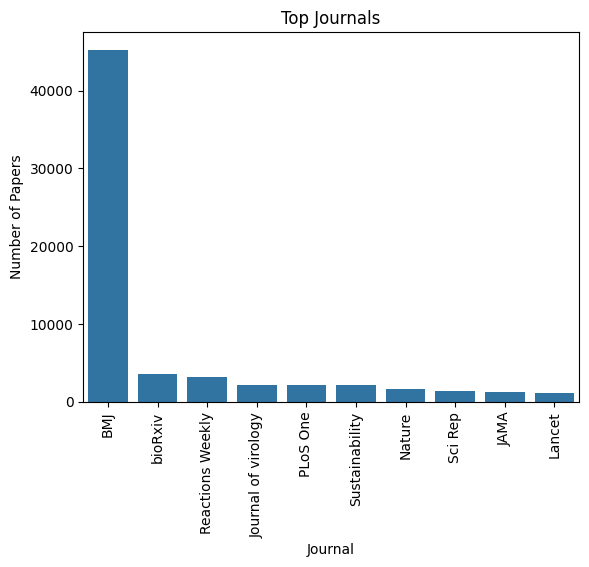

In [76]:
sns.barplot(data=top_journals, x='journal', y='num_papers')
plt.title('Top Journals')
plt.xlabel('Journal')
plt.ylabel('Number of Papers')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.show()

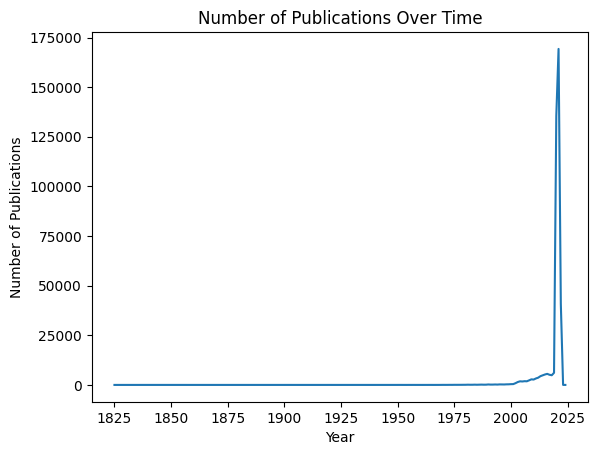

In [77]:
# Number of publications over time
sns.lineplot(data=num_papers, x='publish_year', y='num_papers')
plt.title('Number of Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

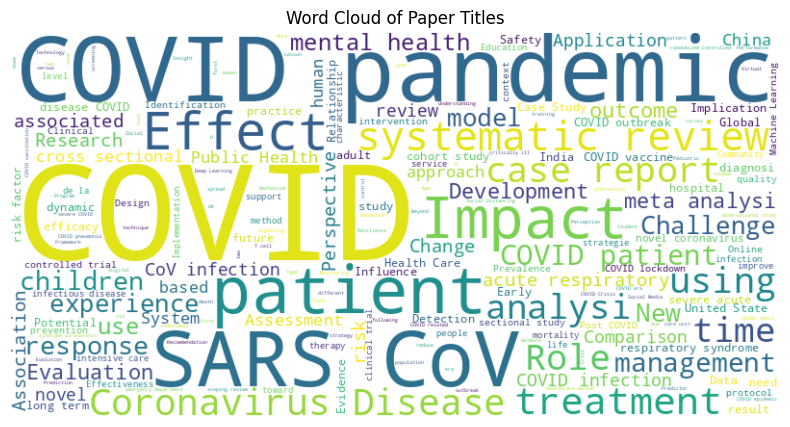

In [78]:
# Word cloud of paper titles
from wordcloud import WordCloud
text = ' '.join(new_data['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.show()


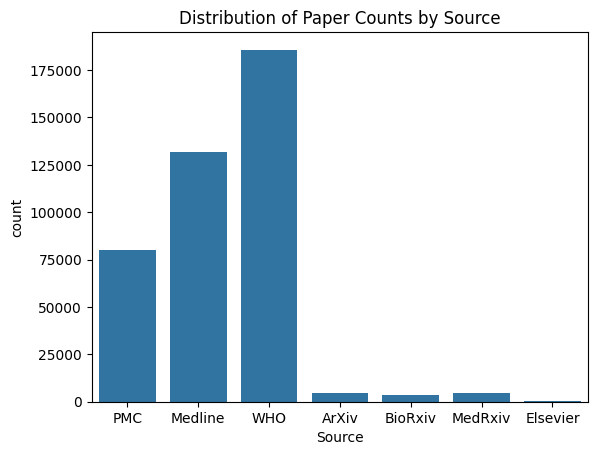

In [79]:
# Distribution of paper counts by source
sns.countplot(data=new_data, x='source_x')
plt.title('Distribution of Paper Counts by Source')
plt.xlabel('Source')
plt.show()